# GRIP: The Sparks Foundation

Data Science and Business Analytics Internship (GRIP MAY 2023)

# Task 2: Prediction Using Unsupervised Machine Learning

# Author: NIKITA SHISHIR THAKARE

 # Aim : To Predict the optimum number of clusters and represent it visually.

     K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering 
     problems in machine learning. K-Means Clustering is an Unsupervised Learning algorithm, 
     which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters 
     that need to be created in the process.

    Objective is to identify the correct group each data point should belong to.


In [81]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [82]:
iris_df = pd.read_csv("Iris.csv")

# Exploratory Data Analysis

In [83]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [85]:
iris_df.shape

(150, 6)

In [86]:
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [87]:
iris_df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [88]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [89]:
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [90]:
iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Data Visualization

In [91]:
iris_df.skew()>0

Id               False
SepalLengthCm     True
SepalWidthCm      True
PetalLengthCm    False
PetalWidthCm     False
dtype: bool

In [92]:
iris_df.kurt()<0

Id                True
SepalLengthCm     True
SepalWidthCm     False
PetalLengthCm     True
PetalWidthCm      True
dtype: bool

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

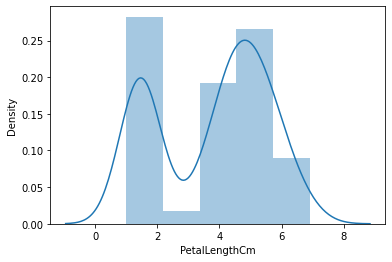

In [93]:
sns.distplot(iris_df['PetalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

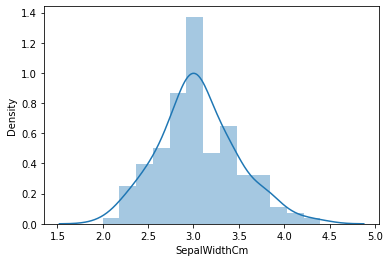

In [94]:
sns.distplot(iris_df['SepalWidthCm'])

<AxesSubplot:>

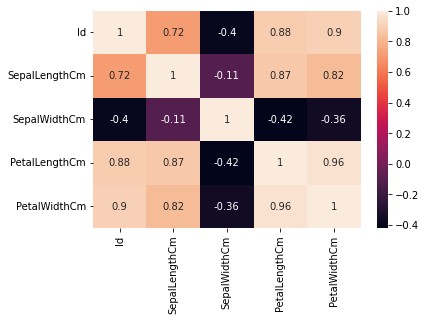

In [95]:
sns.heatmap(iris_df.corr(),annot=True)

There is strongly positive correlation between the SepalLengthCm and PetalWidthCm, PetalLengthCm and SepalLengthCm. And high positive correlation between PetalLengthCm and PetalWidthCm.

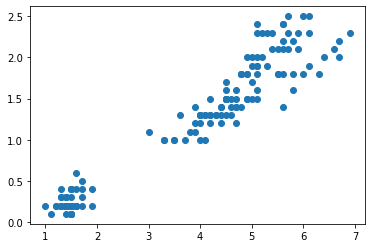

In [96]:
plt.scatter(iris_df['PetalLengthCm'],iris_df['PetalWidthCm'])

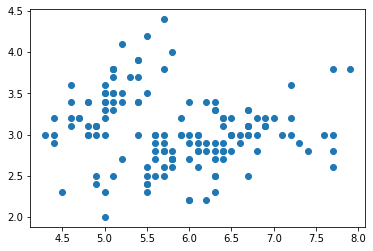

In [97]:
plt.scatter(iris_df['SepalLengthCm'],iris_df['SepalWidthCm'])

In [98]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [99]:
from sklearn.cluster import KMeans
wcss = []

In [100]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[281831.5446666667,
 70581.38080000003,
 31320.71120000001,
 17758.792503556186,
 11468.96874702381,
 7921.8634730769245,
 5911.632365518541,
 4541.979023391813,
 3571.9110955882347,
 2943.933100840336]

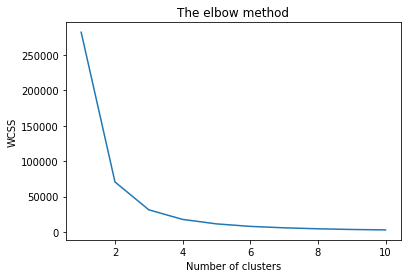

In [101]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as'3'.

# Applying kmeans to the dataset / Creating the kmeans classifier

In [102]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

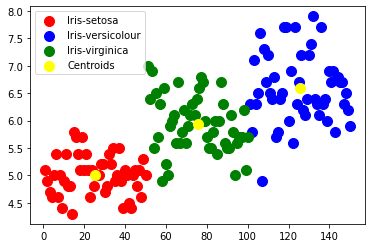

In [103]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()